In [1]:
# 1. Importing the library
from sklearn import tree
import pandas as pd
import seaborn as sns # creating box plot - find out any outliers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
#Import os package
import os
%matplotlib inline

In [2]:
# 2. Dataset
# Input variables with three features (Height, Weight, Shoe Size)
#raw_data = pd.read_excel('../data/gender_classification_data.xlsx')

# Set raw data file paths
raw_file_path = os.path.join(os.path.pardir, 'data', 'raw')
raw_data_file_path = os.path.join(raw_file_path, 'gender_classification_data.xlsx')
raw_data = pd.read_excel(raw_data_file_path)

In [3]:
raw_data.head()

,Height,Weight,Shoe_Size,Height Inches,Gender
0,180,80.0,44.0,70.8660,Male
1,178,78.0,42.0,70.0786,Male
2,160,60.0,38.0,62.9920,Male
3,140,50.0,34.0,55.1180,Female
4,130,45.0,NaN,51.1810,Female


In [4]:
# Handling the missing values
missing_data = raw_data[raw_data.isnull().any(axis=1)]
print(missing_data)

    Height  Weight  Shoe_Size  Height Inches  Gender
4      130    45.0        NaN        51.1810  Female
14     146     NaN       32.0        57.4802  Female
18     180    78.0        NaN        70.8660    Male
37     178     NaN       42.0        70.0786    Male


In [5]:
raw_data.loc[raw_data['Height']==130, 'Shoe_Size']
raw_data.loc[raw_data['Weight']==45.0, 'Shoe_Size']

4   NaN
Name: Shoe_Size, dtype: float64

In [6]:
raw_data.loc[raw_data['Gender']=='Female', 'Shoe_Size'].mean()
raw_data.iloc[4:5, 2:3] = raw_data.iloc[4:5, 2:3].fillna(35)

In [7]:
raw_data.loc[raw_data['Height']==146, 'Weight']
raw_data.iloc[14:15, 1:2] = raw_data.iloc[14:15, 1:2].fillna(50)

In [8]:
raw_data.loc[raw_data['Height']==180, 'Shoe_Size'].mean()
raw_data.iloc[18:19, 2:3] = raw_data.iloc[18:19, 2:3].fillna(42)

In [9]:
raw_data.loc[raw_data['Height']==178, 'Weight'].mean()
raw_data.iloc[37:38, 1:2] = raw_data.iloc[37:38, 1:2].fillna(78)

In [10]:
raw_data

,Height,Weight,Shoe_Size,Height Inches,Gender
0,180,80.0,44.0,70.8660,Male
1,178,78.0,42.0,70.0786,Male
2,160,60.0,38.0,62.9920,Male
3,140,50.0,34.0,55.1180,Female
4,130,45.0,35.0,51.1810,Female
5,144,50.0,38.0,56.6928,Female
6,134,52.0,36.0,52.7558,Female
7,188,84.0,44.0,74.0156,Male
8,190,88.0,44.0,74.8030,Male
9,178,78.0,42.0,70.0786,Male


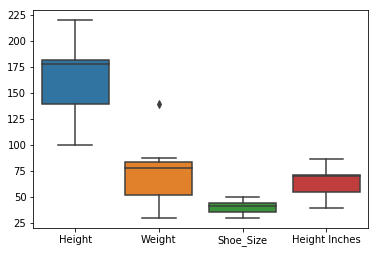

In [11]:
# Outliers
sns.boxplot(data=raw_data, orient='v')

In [12]:
raw_data.loc[raw_data['Weight']>125, 'Weight']
raw_data.drop(raw_data.index[73], inplace = True)

In [13]:
# Dropping redundant column
raw_data.drop(['Height Inches'], axis = 1, inplace=True)

In [14]:
# Processed data path
processed_data_path = os.path.join(os.path.pardir, 'data', 'processed')
write_processed_data_path = os.path.join(processed_data_path, 'processed_gender_classificaiton_data.xlsx')
raw_data.to_excel(write_processed_data_path, index=False)

In [15]:
# Read processed data to feed into the model
processed_data = pd.read_excel(write_processed_data_path)

In [16]:
processed_data

,Height,Weight,Shoe_Size,Gender
0,180,80,44,Male
1,178,78,42,Male
2,160,60,38,Male
3,140,50,34,Female
4,130,45,35,Female
5,144,50,38,Female
6,134,52,36,Female
7,188,84,44,Male
8,190,88,44,Male
9,178,78,42,Male


In [17]:
train, test = train_test_split(processed_data, test_size = 0.2)
print("Training size: {}, Test Size {}".format(len(train), len(test)))

Training size: 79, Test Size 20


In [71]:
features = ['Height', 'Weight', 'Shoe_Size']
X_train = train[features]
y_train = train['Gender']

X_test = test[features]
y_test = test['Gender'] # actual values from 8 rows of test

In [72]:
# Creating the model
clf = tree.DecisionTreeClassifier()

In [73]:
# Training the model
clf = clf.fit(X_train, y_train)

In [74]:
# Predict based on a new set of input variables
y_pred = clf.predict(X_test)  # predicted vaues of 8 rows

In [75]:
print(y_pred)

['Female' 'Male' 'Male' 'Male' 'Female' 'Male' 'Male' 'Male' 'Female'
 'Male' 'Male' 'Female' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male'
 'Female']


In [76]:
score = accuracy_score(y_test, y_pred) * 100

In [77]:
print("Accuracy using Decision Tree: ", score, "%")

Accuracy using Decision Tree:  95.0 %
